{'info': defaultdict(<class 'list'>, {'name': ['Muse'], 'type': ['EEG'], 'channel_count': ['5'], 'channel_format': ['float32'], 'source_id': ['Muse00:55:DA:BB:6F:7A'], 'nominal_srate': ['256.0000000000000'], 'version': ['1.100000000000000'], 'created_at': ['9552.915796933999'], 'uid': ['3b1f0320-dcd9-406e-b0f7-3e6d658a6281'], 'session_id': ['default'], 'hostname': ['ahmad-Lenovo-IdeaPad-S340-14API'], 'v4address': [None], 'v4data_port': ['16572'], 'v4service_port': ['16596'], 'v6address': [None], 'v6data_port': ['16573'], 'v6service_port': ['16597'], 'desc': [defaultdict(<class 'list'>, {'manufacturer': ['Muse'], 'channels': [defaultdict(<class 'list'>, {'channel': [defaultdict(<class 'list'>, {'label': ['TP9'], 'unit': ['microvolts'], 'type': ['EEG']}), defaultdict(<class 'list'>, {'label': ['AF7'], 'unit': ['microvolts'], 'type': ['EEG']}), defaultdict(<class 'list'>, {'label': ['AF8'], 'unit': ['microvolts'], 'type': ['EEG']}), defaultdict(<class 'list'>, {'label': ['TP10'], 'unit': 

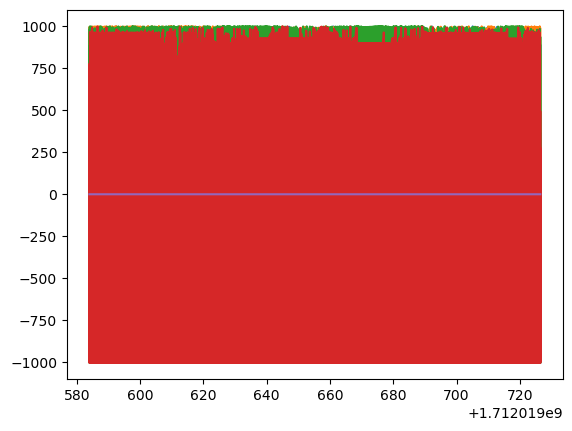

In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np

import pprint

file = 'sub-P001_ses-S001_task-Default_run-001_eeg.xdf'
file_1 = 'sub-P001_ses-S001_task-Default_run-001_eeg_old1.xdf'
file_2 = 'sub-P001_ses-S001_task-Default_run-001_eeg.xdf'

data, header = pyxdf.load_xdf(file_2)


for stream in data:
    y = stream['time_series']

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            print(timestamp, 'time')
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.plot(stream['time_stamps'], y)

        print(stream)
    else:
        raise RuntimeError('Unknown stream format')

plt.show()

Creating RawArray with float64 data, n_channels=3, n_times=36480
    Range : 0 ... 36479 =      0.000 ...   142.496 secs
Ready.
Using matplotlib as 2D backend.


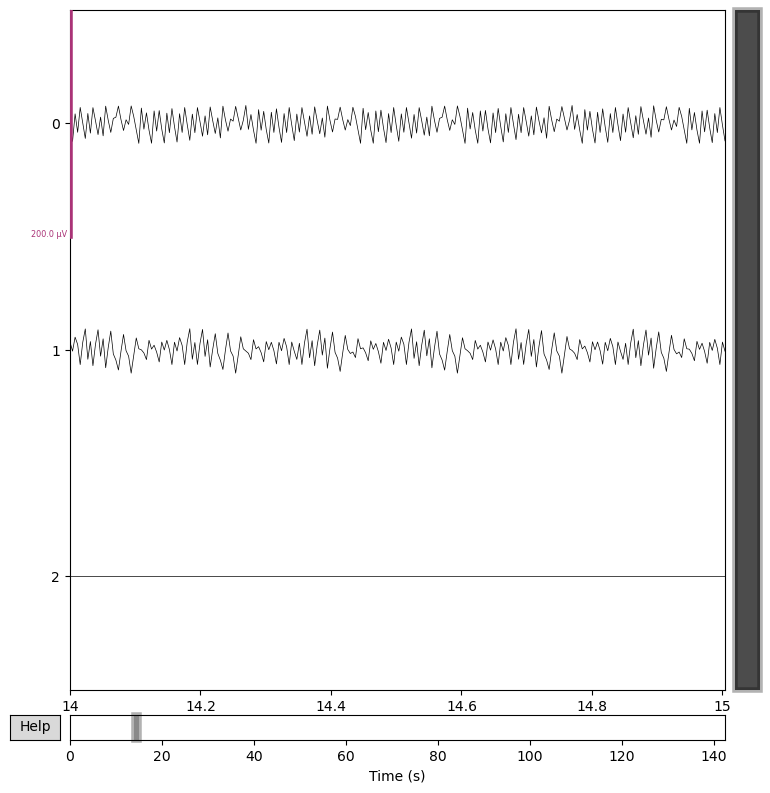

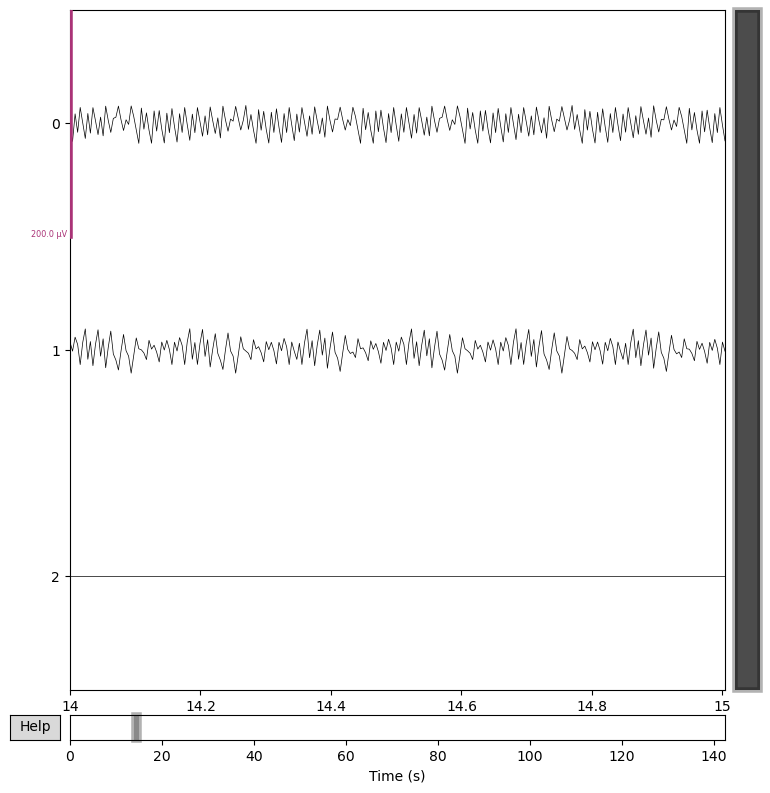

In [2]:
import pyxdf

import mne
from mne.datasets import misc

fname = 'sub-P001_ses-S001_task-Default_run-001_eeg.xdf'

# fname = misc.data_path() / "xdf" / "sub-P001_ses-S004_task-Default_run-001_eeg_a2.xdf"
streams, header = pyxdf.load_xdf(file_2)
data = streams[0]["time_series"].T
assert data.shape[0] == 5  # four raw EEG plus one stim channel
data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
data = data[::2]  # subselect
data[:2] *= 1e-6 / 50 / 2  # uV -> V and preamp gain
sfreq = float(streams[0]["info"]["nominal_srate"][0])
info = mne.create_info(3, sfreq, ["eeg", "eeg", "stim"])
raw = mne.io.RawArray(data, info)
raw.plot(scalings=dict(eeg=100e-6), duration=1, start=14)